FastCar is a car rental company based out of Vilnius. It rents cars for both inside city and outsside at affordable prices. The users can rent different types of cars like Sedans, Hatchbacks, SUVs and MUVs, Minivans, and so on.

In recent times, the demand for cars is on the rise. As a result, the company would like to tackle the problem of supply and demand. The ultimate goal of the company is to strike the balance between supply and demand in order to meet user expectations. The company has collected the details of each rental. Based on the past data, the company would like to forecast the demand for car rentals on an hourly basis.

The main objective of the problem is to develop the machine learning approach to forecast the demand for car rentals on an hourly basis using what you heard about PyCaret and learn from Domas. The dataset is cars_demand.csv

# EDA

In [18]:
import pandas as pd
df = pd.read_csv('Data/cars_demand.csv')
df.tail()

,date,hour,demand
178,2020-2-14,8,12
179,2020-2-14,9,85
180,2020-2-14,12,41
181,2020-2-14,14,110
182,2020-2-14,15,41


In [19]:
df['date']=pd.to_datetime(df['date'])
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['quarter']=df['date'].dt.quarter
df['dow']=df['date'].dt.dayofweek

In [20]:
len(df['year'].unique())
df['year'].unique()

array([2018, 2019, 2020, 2021])

In [21]:
#Train set:
df_train = df[df['year']!=2021]

# or
df_train = df[~(df['year']==2021)]

In [22]:
#Test set
df_test = df[df['year']==2021]

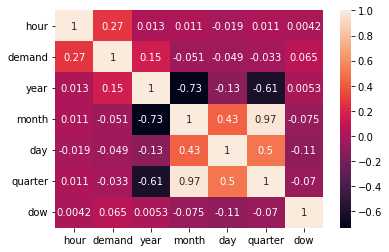

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df.drop('date', axis=1)
sns.heatmap(df.corr(), annot=True)
plt.show()

# Model Building

In [24]:
df_train.drop('year', axis=1, inplace=True)
df_train.drop('date', axis=1, inplace=True)
df_test.drop('year', axis=1, inplace=True)
df_test.drop('date', axis=1, inplace=True)


# Setup Model

In [26]:
from pycaret import regression
model_setup = regression.setup(data=df_train, target='demand')

,Description,Value
0,session_id,5270
1,Target,demand
2,Original Data,"(138, 6)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(96, 37)"


# Compare Models

In [28]:
best=regression.compare_models(exclude=['lar'], sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,19.7657,695.7224,25.3469,0.1951,0.5737,0.8735,0.0380
lasso,Lasso Regression,20.4369,703.8708,25.5263,0.1926,0.5782,0.8865,0.0040
omp,Orthogonal Matching Pursuit,20.6320,712.0579,25.8761,0.1482,0.5856,0.8265,0.0040
gbr,Gradient Boosting Regressor,20.1136,708.6393,25.9092,0.1410,0.6140,0.8459,0.0080
br,Bayesian Ridge,21.0704,721.3087,26.0001,0.1529,0.5854,0.8997,0.0040
catboost,CatBoost Regressor,21.1700,747.7082,26.5620,0.1068,0.5941,0.8980,0.0500
ridge,Ridge Regression,20.7926,748.9112,26.6480,0.0850,0.5961,0.8688,0.0040
ada,AdaBoost Regressor,21.2564,764.2796,26.8953,0.0940,0.5961,0.8617,0.0130
xgboost,Extreme Gradient Boosting,20.9223,774.6770,27.0592,0.0725,0.6238,0.9127,0.0230
en,Elastic Net,24.1679,868.8201,28.5751,-0.0219,0.6242,0.9839,0.0040


# Generate Model 

In [29]:
rf = regression.create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15.3590,678.7175,26.0522,0.2527,0.7152,0.9955
1,18.3760,653.4457,25.5626,0.2231,1.0334,2.7472
2,24.2640,1004.4592,31.6932,-0.0053,0.5219,0.4830
3,18.0590,456.6727,21.3699,-0.0749,0.3707,0.2634
4,16.8590,442.0122,21.0241,0.3819,0.3854,0.3256
5,10.0220,171.1513,13.0825,0.5741,0.2721,0.2081
6,35.0367,1495.3098,38.6692,0.2243,0.8828,1.4845
7,25.0789,1011.7824,31.8085,-0.3449,0.4165,0.3238
8,15.0200,266.8395,16.3352,0.3700,0.2486,0.2150
9,19.5822,776.8340,27.8717,0.3504,0.8907,1.6889


# Tune/Optimize Model

In [30]:
tuned_rf = regression.tune_model(rf, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16.8244,777.1913,27.8782,0.1443,0.7401,1.0674
1,18.2444,468.9299,21.6548,0.4425,0.9678,2.0410
2,22.6734,778.6160,27.9037,0.2207,0.5344,0.4796
3,17.2065,365.8040,19.1260,0.1390,0.3768,0.3246
4,14.7849,296.9510,17.2323,0.5847,0.2989,0.2717
5,14.5275,330.0046,18.1660,0.1789,0.3587,0.2800
6,32.3102,1335.8732,36.5496,0.3070,0.7963,1.1756
7,20.6488,764.7120,27.6534,-0.0165,0.3490,0.2556
8,10.6057,160.1502,12.6550,0.6219,0.1775,0.1508
9,25.5787,1050.8238,32.4164,0.1212,0.9575,1.9081


# Evaluate Model

In [32]:
regression.evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Finalizing the Model

In [33]:
final_rf = regression.finalize_model(tuned_rf)

# Evaluate Model on Unseen Data

In [34]:
unseen_predictions = regression.predict_model(final_rf, data=df_test)
unseen_predictions.head()

,hour,demand,month,day,quarter,dow,Label
123,9,87,4,17,2,5,70.142857
124,10,40,4,17,2,5,45.186441
125,13,81,4,17,2,5,45.186441
126,14,91,4,17,2,5,77.000000
127,15,101,4,17,2,5,77.833333


In [35]:
from platform import python_version

In [36]:
python_version()

'3.9.9'